In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv("./data/wisconsin.csv")

print df.columns

df.head()

Index([u'id', u'diagnosis', u'radius_mean', u'texture_mean', u'perimeter_mean',
       u'area_mean', u'smoothness_mean', u'compactness_mean',
       u'concavity_mean', u'concave points_mean', u'symmetry_mean',
       u'fractal_dimension_mean', u'radius_se', u'texture_se', u'perimeter_se',
       u'area_se', u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave points_se', u'symmetry_se', u'fractal_dimension_se',
       u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave points_worst', u'symmetry_worst', u'fractal_dimension_worst',
       u'Unnamed: 32'],
      dtype='object')


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
df = df.drop('id', axis=1)
df = df.fillna(value=0)
data = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X1 = data.values

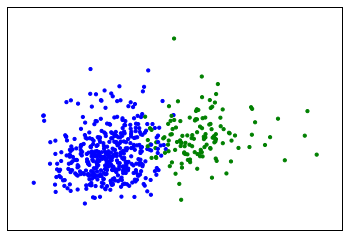

77943099.8783
Homogeneity: 0.422
Completeness: 0.517


In [3]:
from sklearn.cluster import KMeans
from sklearn import metrics

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

model = KMeans(n_clusters=2, n_init=1, max_iter=10, algorithm='elkan', tol=1e-4, verbose=False)
model.fit(X1)
labels = model.labels_

plt.scatter(X1[:, 0], X1[:, 1], color=colors[labels].tolist(), s=10)
plt.xticks(())
plt.yticks(())
plt.show()

print model.inertia_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))

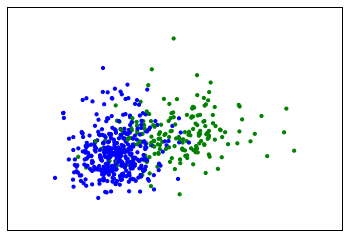

215.83831972
Homogeneity: 0.611
Completeness: 0.635


In [4]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X1 = X1.astype(np.float64)
X2 = min_max_scaler.fit_transform(X1)

model = KMeans(n_clusters=2, n_init=1, max_iter=10, algorithm='elkan', tol=1e-4, verbose=False)
model.fit(X2)
labels = model.labels_

plt.scatter(X2[:, 0], X2[:, 1], color=colors[labels].tolist(), s=10)
plt.xticks(())
plt.yticks(())
plt.show()

print model.inertia_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))

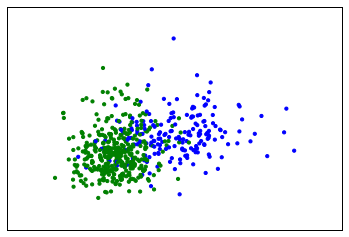

200.880320609
Homogeneity: 0.611
Completeness: 0.635


In [5]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

min_max_scaler = preprocessing.MinMaxScaler()
X1 = X1.astype(np.float64)
X2 = min_max_scaler.fit_transform(X1)

pca = PCA(n_components=10)
X3 = pca.fit_transform(X2)

model = KMeans(n_clusters=2, n_init=1, max_iter=10, algorithm='full', tol=1e-4, verbose=False)
model.fit(X3)
labels = model.labels_

plt.scatter(X2[:, 0], X2[:, 1], color=colors[labels].tolist(), s=10)
plt.xticks(())
plt.yticks(())
plt.show()

print model.inertia_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))

(569, 31)
Accuracy is  88.4057971014


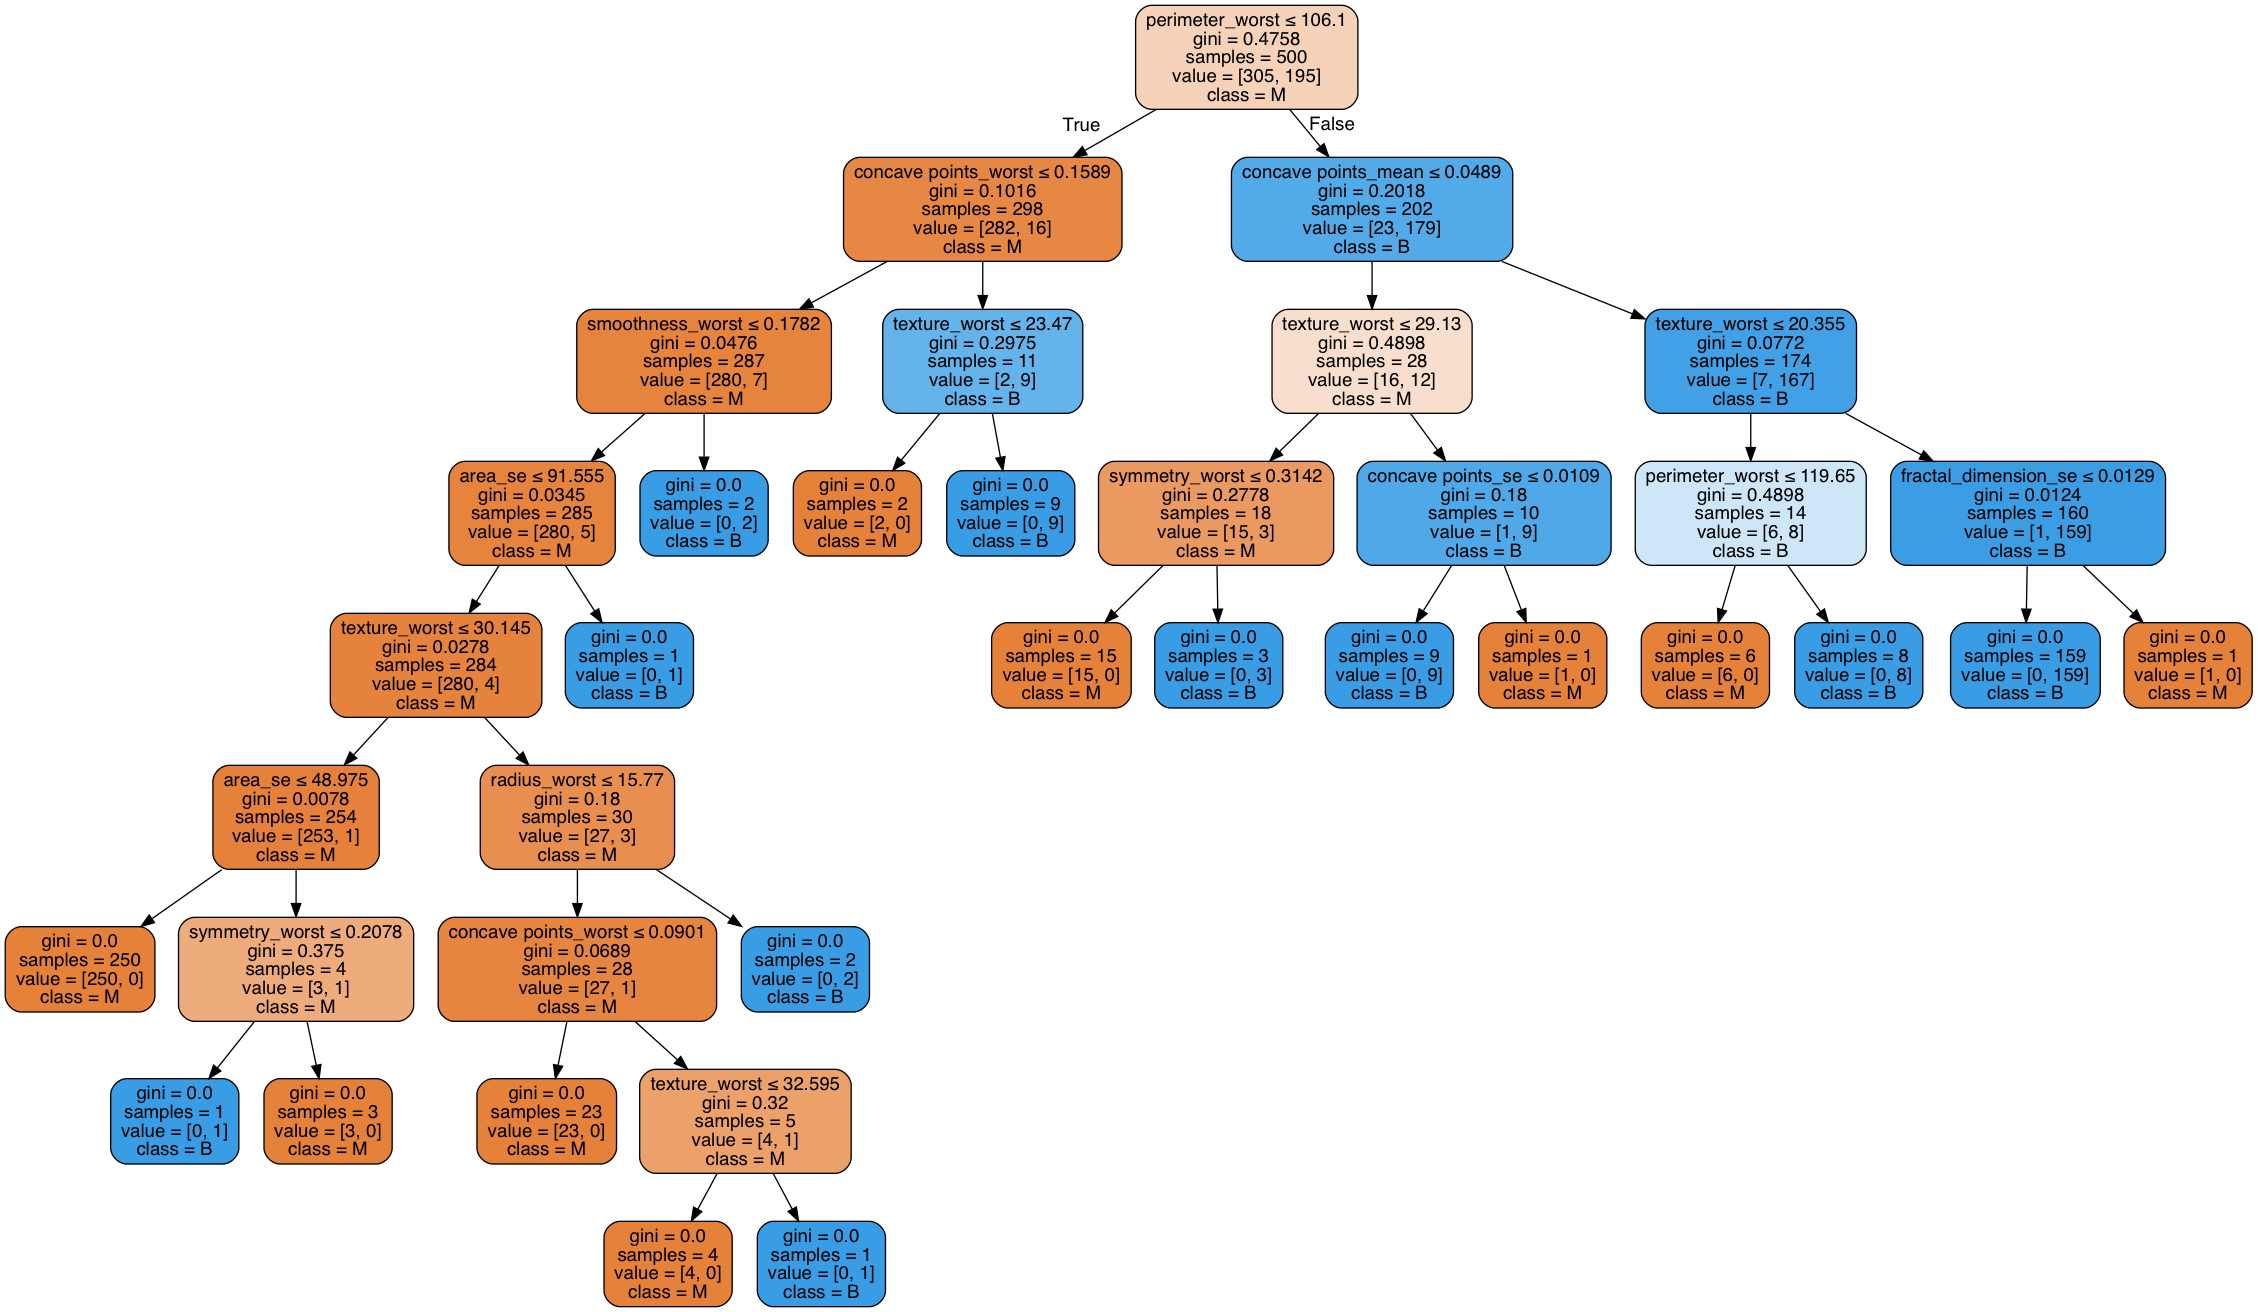

In [20]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from IPython.display import Image  
import pydotplus

# don't forget install graphviz executable !
def show_tree(clf, columns, labels):
    dot_data = tree.export_graphviz(
        clf, 
        out_file=None, 
        feature_names=columns,  
        class_names=labels,  
        filled=True, 
        rounded=True,  
        special_characters=True
    )
    graph = pydotplus.graph_from_dot_data(dot_data)  
    ImageObject = Image(graph.create_png())
    display(ImageObject)

    
# prepare dataset
print X1.shape
labels = ['M', 'B']
columns = df.columns.copy().values
columns = columns[1:]
n_train_data = 500
X1_train = X1[:n_train_data]
y_train = y[:n_train_data]
X1_test = X1[n_train_data:]
y_test = y[n_train_data:]

# training
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X1_train, y_train)

# validation
y_pred = clf.predict(X1_test)
print "Accuracy is ", accuracy_score(y_test, y_pred)*100
show_tree(clf, columns, labels)

Accuracy is  89.8550724638


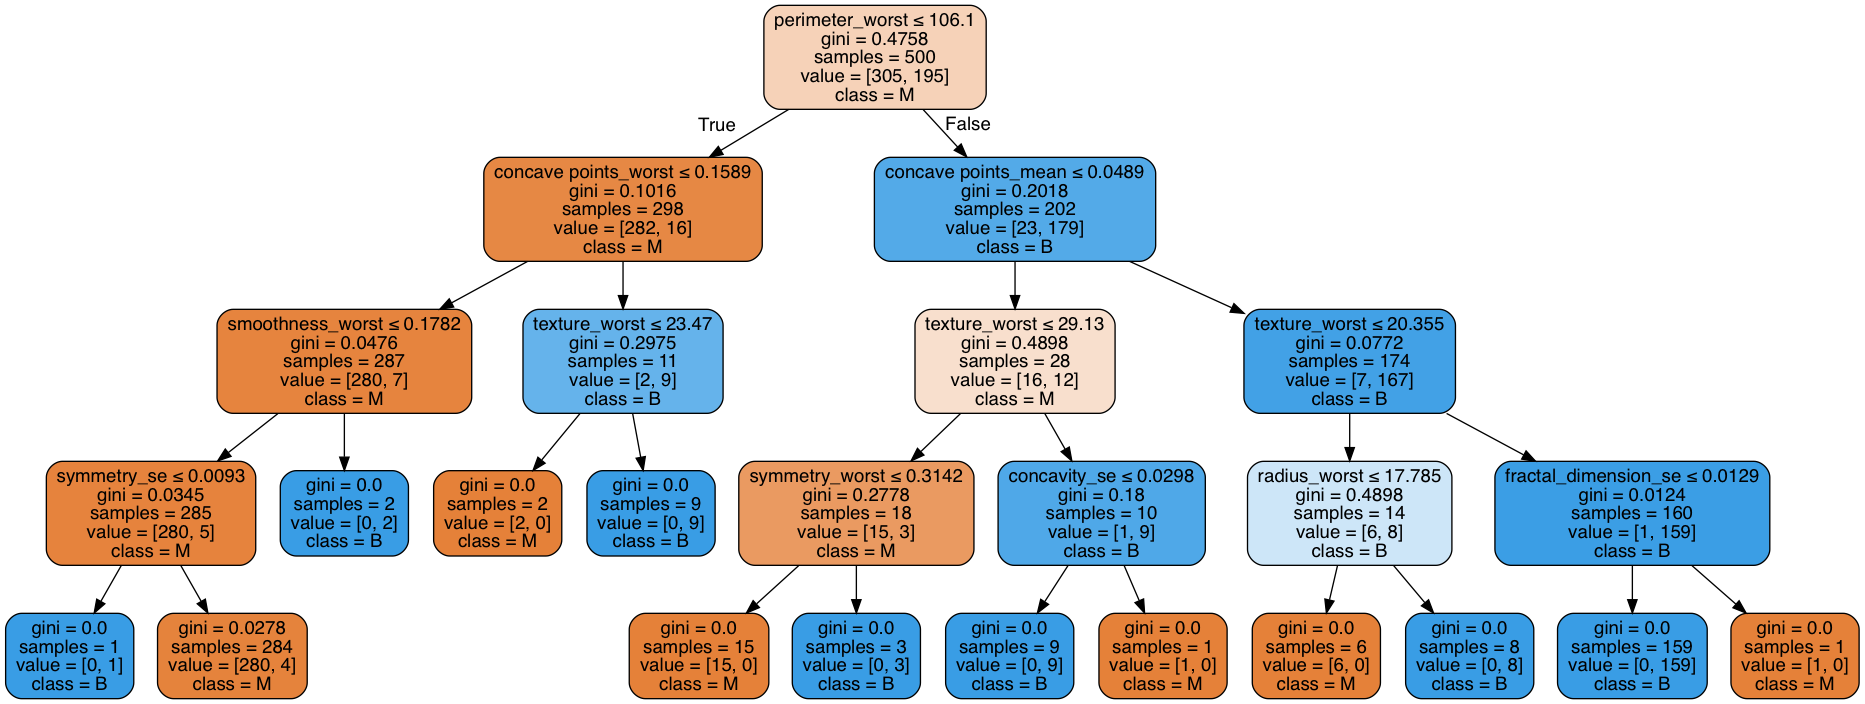

In [21]:
# training
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X1_train, y_train)

# validation
y_pred = clf.predict(X1_test)
print "Accuracy is ", accuracy_score(y_test, y_pred)*100
show_tree(clf, columns, labels)

Accuracy is  95.652173913


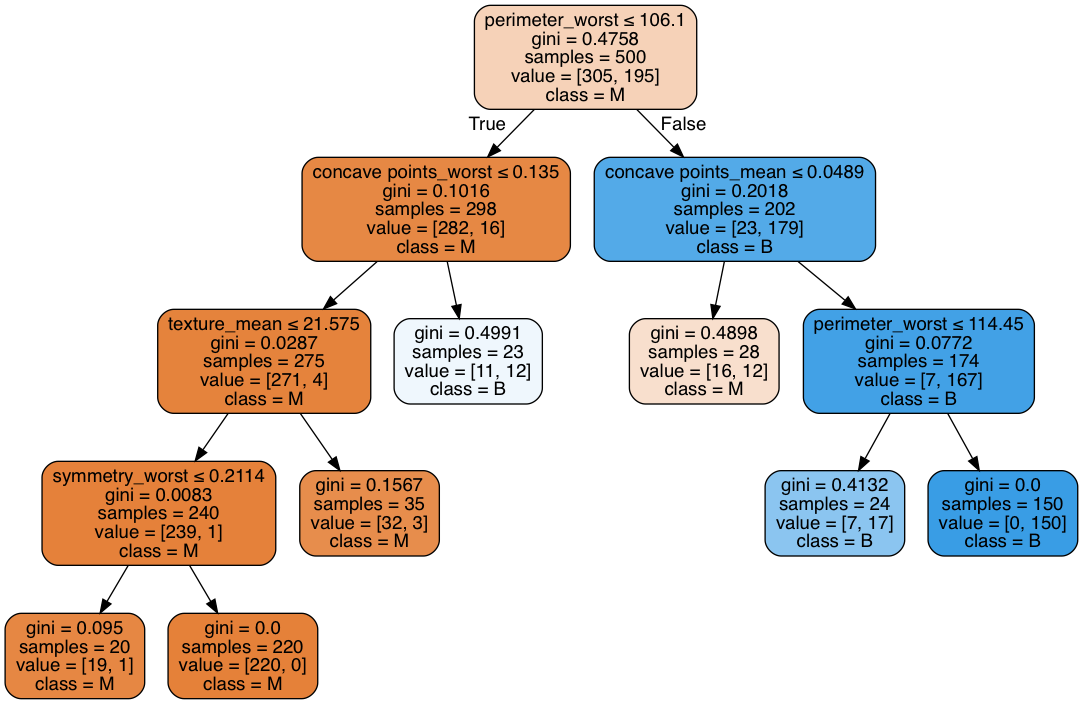

,feature,importance
1,texture_mean,0.002079
7,concave points_mean,0.069657
22,perimeter_worst,0.871911
27,concave points_worst,0.055884
28,symmetry_worst,0.000469


In [26]:
# training
clf = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)
clf = clf.fit(X1_train, y_train)

# validation
y_pred = clf.predict(X1_test)
print "Accuracy is ", accuracy_score(y_test, y_pred)*100
show_tree(clf, columns, labels)
df = pd.DataFrame(data={'feature': columns, 'importance': clf.feature_importances_})
display(df[df['importance'] > 0])